In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import hddm
from sys import platform

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
print(hddm.__version__)

0.6.0


In [6]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/Krista/'

In [7]:
all_obs_data = hddm.load_csv(home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

print(all_obs_data.columns)

all_obs_data.loc[all_obs_data.p_id_solution == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.p_id_solution == 112, 'p_id_solution'] = 1

all_obs_data.loc[all_obs_data.id_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.id_choice == 112, 'id_choice'] = 1

all_obs_data = all_obs_data.rename(index=str, columns={"id_choice": "response", 
                                                        "ID": "subj_idx", "p_id_solution": "stimulus"})
all_obs_data = all_obs_data[['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'ideal_B', 'cpp']] 
all_obs_data = all_obs_data.rename(index=str, columns={'target_B': 'B'})

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'ID',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target', 'LR_choice', 'obs_LR_accuracy', 'obs_LR_solution',
       'reward', 'cumulative_reward', 'rt', 'total_trial_time', 'iti',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'obs_high_val_cue',
       'ID.1', 'condition', 'coded_condition', 'original_trial', 'epoch_n',
       'epoch_trial', 'shifted_epoch_trial', 'max_epoch_n',
       'epoch_trial_zero_idx', 'epoch_trial_one_idx',
       'shifted_epoch_trial_zero_idx', 'repeat_trial', 'prop_112',
       'n_epoch_trials', 'p_id_solution', 'obs_low_val_cue', 'id_choice',
       'p_id_accuracy'],
      dtype='object')


In [8]:
all_obs_data.head()

,response,stimulus,rt,condition,subj_idx,ideal_B,cpp
0,0,0,0.711570,hc,761,0.000000,0.099471
1,1,0,0.681410,hc,761,-1.241007,0.035079
2,0,0,0.767118,hc,761,-0.595781,0.023075
3,1,0,0.507209,hc,761,-0.306135,0.019881
4,0,0,0.656259,hc,761,-0.139394,0.018539


In [104]:
#get all combinations of a,t,v,z 
from itertools import combinations

targets = [{'a':'condition'}, {'t':'condition'}, {'v':'condition'}, {'z':'condition'}]
param_pairs = list(combinations(targets, 2))
param_triples = list(combinations(targets, 3))
print(param_pairs)
print(len(param_pairs))
print(param_triples)
print(len(param_triples))

[({'a': 'condition'}, {'t': 'condition'}), ({'a': 'condition'}, {'v': 'condition'}), ({'a': 'condition'}, {'z': 'condition'}), ({'t': 'condition'}, {'v': 'condition'}), ({'t': 'condition'}, {'z': 'condition'}), ({'v': 'condition'}, {'z': 'condition'})]
6
[({'a': 'condition'}, {'t': 'condition'}, {'v': 'condition'}), ({'a': 'condition'}, {'t': 'condition'}, {'z': 'condition'}), ({'a': 'condition'}, {'v': 'condition'}, {'z': 'condition'}), ({'t': 'condition'}, {'v': 'condition'}, {'z': 'condition'})]
4


In [105]:
model_dict = {'a_t': param_pairs[0], 'a_v': param_pairs[1],
'a_z': param_pairs[2], 't_v': param_pairs[3], 
't_z': param_pairs[4], 'v_z': param_pairs[5], 'a': targets[0], 't': targets[1],
             'v': targets[2], 'z': targets[3]}

In [106]:
n_samples, n_burn = 3000, 500

## Flat model

In [139]:
flat_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, bias=True, stim_col='stimulus', split_param='v')
flat_m.find_starting_values()
flat_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1090.8 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has bee

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has bee

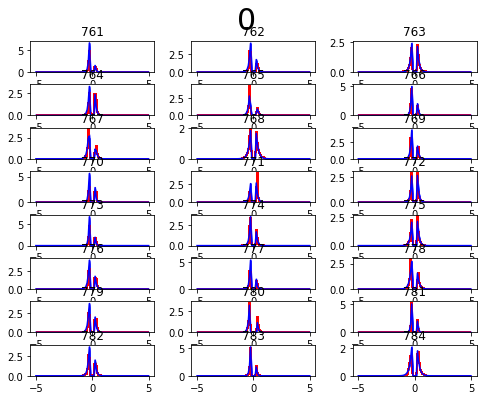

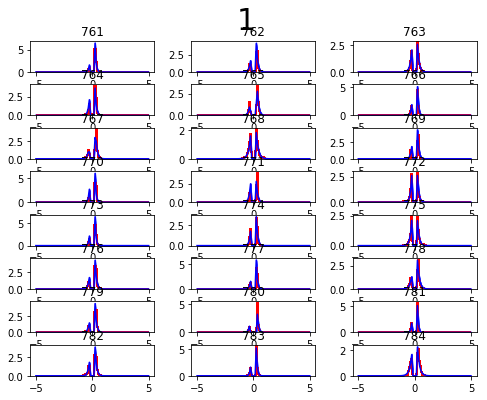

In [108]:
flat_m.plot_posterior_predictive()

In [ ]:
all_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05,  stim_col='stimulus', split_param='v', depends_on={'a': 'condition', 't': 'condition', 'v': 'condition', 'z': 'condition'}, bias=True)
all_m.find_starting_values()
all_m.sample(n_samples, burn=n_burn)

## All pairs.

In [109]:
a_t_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05,  stim_col='stimulus', split_param='v', depends_on={'a': 'condition', 't': 'condition'}, bias=True)
a_t_m.find_starting_values()
a_t_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3000 of 3000 complete in 1285.2 sec

In [110]:
a_v_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, stim_col='stimulus', split_param='v', depends_on={'a': 'condition', 'v': 'condition'}, bias=True)
a_v_m.find_starting_values()
a_v_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3000 of 3000 complete in 1260.1 sec

In [111]:
a_z_m=hddm.HDDMStimCoding(all_obs_data,p_outlier=0.05, stim_col='stimulus', split_param='v', depends_on={'a': 'condition', 'z': 'condition'}, bias=True)
a_z_m.find_starting_values()
a_z_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1316.7 sec

In [112]:
#fit hddm model according to above 
t_v_m=hddm.HDDMStimCoding(all_obs_data,p_outlier=0.05, stim_col='stimulus', split_param='v', depends_on={'t': 'condition', 'v': 'condition'}, bias=True)
t_v_m.find_starting_values()
t_v_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1440.3 sec

In [113]:
#fit hddm model according to above 
t_z_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, stim_col='stimulus', split_param='v',depends_on={'t': 'condition', 'z': 'condition'}, bias=True)
t_z_m.find_starting_values()
t_z_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1577.7 sec

In [114]:
#fit hddm model according to above 
v_z_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, stim_col='stimulus', split_param='v',depends_on={'v': 'condition', 'z': 'condition'}, bias=True)
v_z_m.find_starting_values()
v_z_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1533.6 sec

## All single parameters. 

In [115]:
a_m=hddm.HDDMStimCoding(all_obs_data,p_outlier=0.05, stim_col='stimulus', split_param='v', depends_on={'a': 'condition'}, bias=True)
a_m.find_starting_values()
a_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1508.7 sec

In [116]:
t_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, stim_col='stimulus', split_param='v',depends_on={'t': 'condition'}, bias=True)
t_m.find_starting_values()
t_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1506.9 sec

In [117]:
v_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, stim_col='stimulus', split_param='v',depends_on={'v': 'condition'}, bias=True)
v_m.find_starting_values()
v_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1445.1 sec

In [118]:
z_m=hddm.HDDMStimCoding(all_obs_data,p_outlier=0.05, stim_col='stimulus', split_param='v', depends_on={'z': 'condition'}, bias=True)
z_m.find_starting_values()
z_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3000 of 3000 complete in 1505.9 sec

# Parameter triples 

In [119]:
param_triples

[({'a': 'condition'}, {'t': 'condition'}, {'v': 'condition'}),
 ({'a': 'condition'}, {'t': 'condition'}, {'z': 'condition'}),
 ({'a': 'condition'}, {'v': 'condition'}, {'z': 'condition'}),
 ({'t': 'condition'}, {'v': 'condition'}, {'z': 'condition'})]

In [120]:
atv_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, stim_col='stimulus', split_param='v',depends_on={'a': 'condition','t':'condition', 
                                                                                      'v': 'condition'}, bias=True)
atv_m.find_starting_values()
atv_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3000 of 3000 complete in 1380.1 sec

In [121]:
atz_m=hddm.HDDMStimCoding(all_obs_data,p_outlier=0.05,  stim_col='stimulus', split_param='v',depends_on={'a': 'condition','t':'condition', 
                                                                                      'z': 'condition'}, bias=True)
atz_m.find_starting_values()
atz_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1486.0 sec

In [122]:
avz_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, stim_col='stimulus', split_param='v',depends_on={'a': 'condition','v':'condition', 
                                                                                      'z': 'condition'}, bias=True)
avz_m.find_starting_values()
avz_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1484.7 sec

In [123]:
tvz_m=hddm.HDDMStimCoding(all_obs_data,p_outlier=0.05,  stim_col='stimulus', split_param='v',depends_on={'t': 'condition','v':'condition', 
                                                                                      'z': 'condition'}, bias=True)
tvz_m.find_starting_values()
tvz_m.sample(n_samples, burn=n_burn)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1485.3 sec

# Parameter quadruples 

In [10]:
atvz_m=hddm.HDDMStimCoding(all_obs_data, p_outlier=0.05, stim_col='stimulus', split_param='v',depends_on={'a': 'condition','t': 'condition','v':'condition', 
                                                                                      'z': 'condition'}, bias=True)
atvz_m.find_starting_values()
atvz_m.sample(3000, burn=50)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3000 of 3000 complete in 1770.5 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [127]:
# single_param_dics = [a_m.dic, t_m.dic, v_m.dic, z_m.dic]
dual_param_dics = [a_t_m.dic, a_v_m.dic, a_z_m.dic, t_v_m.dic, t_z_m.dic, 
                  v_z_m.dic]
# triple_param_dics = [atv_m.dic, atz_m.dic, avz_m.dic, tvz_m.dic]
# quad_param_dic = atvz_m.dic
all_dics = [a_m.dic, t_m.dic, v_m.dic, z_m.dic, a_t_m.dic, a_v_m.dic, a_z_m.dic, t_v_m.dic, t_z_m.dic, 
                  v_z_m.dic, atv_m.dic, atz_m.dic, avz_m.dic, tvz_m.dic, atvz_m.dic]
all_dics_flat_sub =  all_dics - flat_m.dic 

In [131]:
dual_dics_flat_sub = dual_param_dics - flat_m.dic

In [133]:
dual_dics_flat_sub

array([ 13470.32650306,  21543.03083087,  23183.99092   ,  12534.02855681,
        14423.79955011,  22227.498091  ])

In [141]:
flat_m.dic

-39422.984751452874

In [22]:
# #plot posteriors for winning model 
# v_hc , v_hv ,  v_lc , v_lv  = e.nodes_db.ix[['v(hc)', 'v(hv)', 
#                                                              'v(lc)', 'v(lv)'],
#                                                           'node']


# t_hc , t_hv , t_lc , t_lv  = atvz_m.nodes_db.ix[['t(hc)', 't(hv)', 
#                                                              't(lc)', 't(lv)'],
#                                                           'node']

In [146]:
#plot posteriors for winning model 
v_hc , v_hv ,  v_lc , v_lv  = atvz_m.nodes_db.ix[['v(hc)', 'v(hv)', 
                                                             'v(lc)', 'v(lv)'],
                                                          'node']


t_hc , t_hv , t_lc , t_lv  = atvz_m.nodes_db.ix[['t(hc)', 't(hv)', 
                                                             't(lc)', 't(lv)'],
                                                          'node']

In [23]:
#plot posteriors for winning model 
a_hc , a_hv ,  a_lc , a_lv  = atvz_m.nodes_db.ix[['a(hc)', 'a(hv)', 
                                                             'a(lc)', 'a(lv)'],
                                                          'node']


z_hc , z_hv , z_lc , z_lv  = atvz_m.nodes_db.ix[['z(hc)', 'z(hv)', 
                                                             'z(lc)', 'z(lv)'],
                                                          'node']

In [173]:
t_v_m.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,0.779203,0.0202467,0.74037,0.766099,0.778835,0.791972,0.820335,0.000424898
a_std,0.0963289,0.0156566,0.0726973,0.0854834,0.0938799,0.104463,0.13121,0.000373058
a_subj.761,0.718162,0.00868567,0.701116,0.712278,0.718406,0.723921,0.735269,0.000265135
a_subj.762,0.80761,0.00922041,0.789273,0.801447,0.807688,0.813939,0.825554,0.00029342
a_subj.763,0.844434,0.0114361,0.823465,0.836714,0.843601,0.851338,0.869357,0.000673786
a_subj.764,0.744821,0.00761705,0.730981,0.739608,0.744644,0.750023,0.760202,0.000211907
a_subj.765,0.854986,0.00961075,0.836663,0.848595,0.854927,0.861514,0.873391,0.000278373
a_subj.766,0.716428,0.00764801,0.701449,0.711283,0.71631,0.721474,0.7312,0.000212127
a_subj.767,0.863833,0.00913997,0.845878,0.857885,0.863742,0.870071,0.881682,0.000264101
a_subj.768,0.975795,0.00957394,0.957203,0.969148,0.975828,0.982179,0.994833,0.000227685


Text(0,0.5,'Posterior probability density')

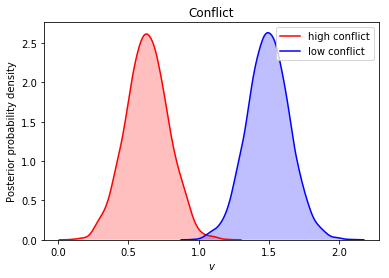

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(v_hc.trace(), color='red',shade=True, label='high conflict')
sns.kdeplot(v_lc.trace(), color='blue',shade=True,label='low conflict')
plt.title("Conflict")
plt.xlabel("$v$")
plt.ylabel('Posterior probability density')
# plt.savefig('conflict_v_fit.png', dpi=600)


Text(0,0.5,'Posterior probability density')

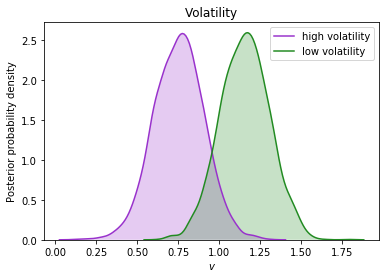

In [17]:
sns.kdeplot(v_hv.trace(), color='darkorchid', shade=True,label='high volatility')
sns.kdeplot(v_lv.trace(), color='forestgreen', shade=True,label='low volatility')
plt.title("Volatility")
plt.xlabel("$v$")
plt.ylabel('Posterior probability density')
# plt.savefig('vol_v_fit.png', dpi=600)


Text(0,0.5,'Posterior probability density')

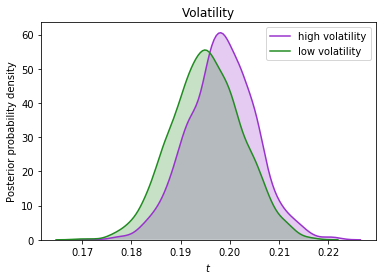

In [19]:
sns.kdeplot(t_hv.trace(), color='darkorchid',shade=True,label='high volatility')
sns.kdeplot(t_lv.trace(), color='forestgreen',shade=True, label='low volatility')
plt.title("Volatility")
plt.xlabel("$t$")
plt.ylabel('Posterior probability density')
# plt.savefig('vol_t_fit.png', dpi=600)


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$t$')

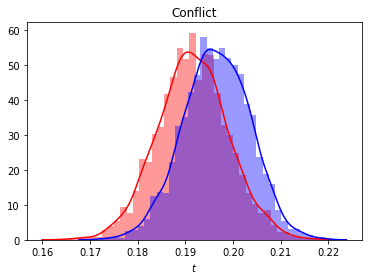

In [20]:
sns.distplot(t_hc.trace(), color='red', label='high conflict')
sns.distplot(t_lc.trace(), color='blue', label='low conflict')
plt.title("Conflict")
plt.xlabel("$t$")
# plt.ylabel('Posterior probability density')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$t$')

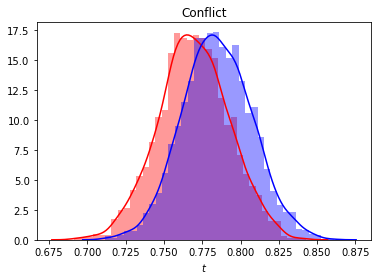

In [24]:
sns.distplot(a_hc.trace(), color='red', label='high conflict')
sns.distplot(a_lc.trace(), color='blue', label='low conflict')
plt.title("Conflict")
plt.xlabel("$t$")
# plt.ylabel('Posterior probability density')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$a$')

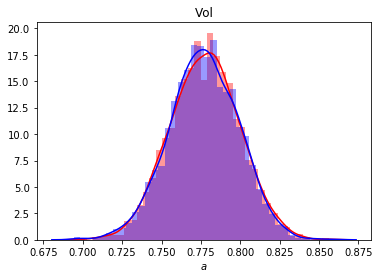

In [25]:
sns.distplot(a_hv.trace(), color='red', label='high vol')
sns.distplot(a_lv.trace(), color='blue', label='low vol')
plt.title("Vol")
plt.xlabel("$a$")
# plt.ylabel('Posterior probability density')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$z$')

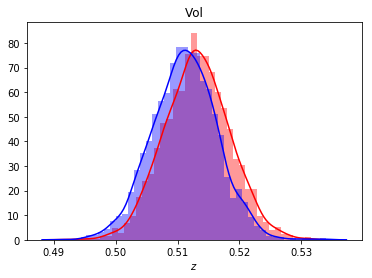

In [26]:
sns.distplot(z_hv.trace(), color='red', label='high vol')
sns.distplot(z_lv.trace(), color='blue', label='low vol')
plt.title("Vol")
plt.xlabel("$z$")
# plt.ylabel('Posterior probability density')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$z$')

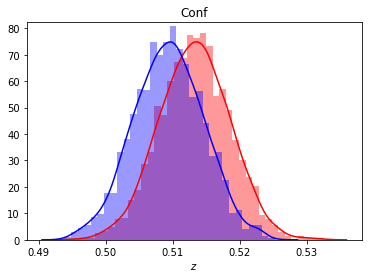

In [27]:
sns.distplot(z_hc.trace(), color='red', label='high conf')
sns.distplot(z_lc.trace(), color='blue', label='low conf')
plt.title("Conf")
plt.xlabel("$z$")
# plt.ylabel('Posterior probability density')

In [137]:
import numpy as np
win_idx=np.where(dual_dics_flat_sub == min(dual_dics_flat_sub))[0]
dual_dics_flat_sub[win_idx]

array([ 12534.02855681])

In [87]:
#send text when the script is done
from twilio.rest import Client
accountSid = 'AC2832bdf83bb5a2f150686d323b7a3440'
authToken = '70363f4f104ac88b8aefc6b7886fb989'
twilioClient = Client(accountSid, authToken)
myTwilioNumber = 6095422252
destCellPhone = 6094242780
myMessage = twilioClient.messages.create(body = "fits are done for observed data.",
                                         from_=myTwilioNumber, to=destCellPhone)